In [164]:
from inference_script import DetectionAnalysis
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [165]:
results_file = Path("../results/benedict/v2z6t9wz.csv")
df = pd.read_csv(results_file)
df.head()

,y_pred,y_score,y_true,snr,correct
0,0,-2.705725e-03,0,0.000000,True
1,1,-1.192093e-07,1,29.373680,True
2,1,-1.192093e-07,1,28.873734,True
3,1,-3.337855e-06,1,23.783968,True
4,0,-1.546855e-03,0,0.000000,True


In [166]:
# print absolute accuracy
print(f"Accuracy over test set: {df['correct'].mean():.2%}")

Accuracy over test set: 98.05%


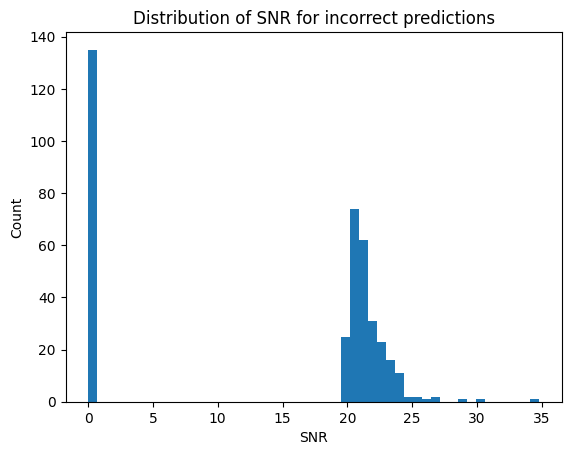

In [167]:
# plot distribution of snr for incorrect
plt.hist(df[~df["correct"]]["snr"], bins=50)
plt.xlabel("SNR")
plt.ylabel("Count")
plt.title("Distribution of SNR for incorrect predictions")
plt.show()

In [168]:
analysis = DetectionAnalysis(df["snr"], df["y_true"], df["y_score"])

In [169]:
fpr, tpr, roc_auc = analysis.compute_roc()
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"ROC AUC: {roc_auc}")


FPR: [0.         0.         0.         ... 0.99990072 1.         1.        ]
TPR: [0.         0.52508294 0.56238062 ... 0.9993968  0.9993968  1.        ]
ROC AUC: 0.8901389964848043


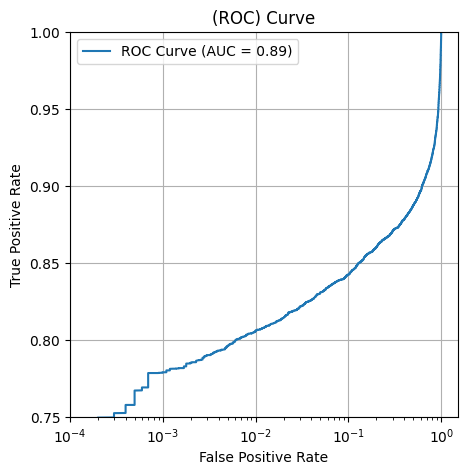

In [170]:
# plot ROC curve
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')


plt.ylim(0.75, 1.)
plt.xlim(10e-5, 1.5)
plt.xscale('log')
plt.legend()
plt.grid()

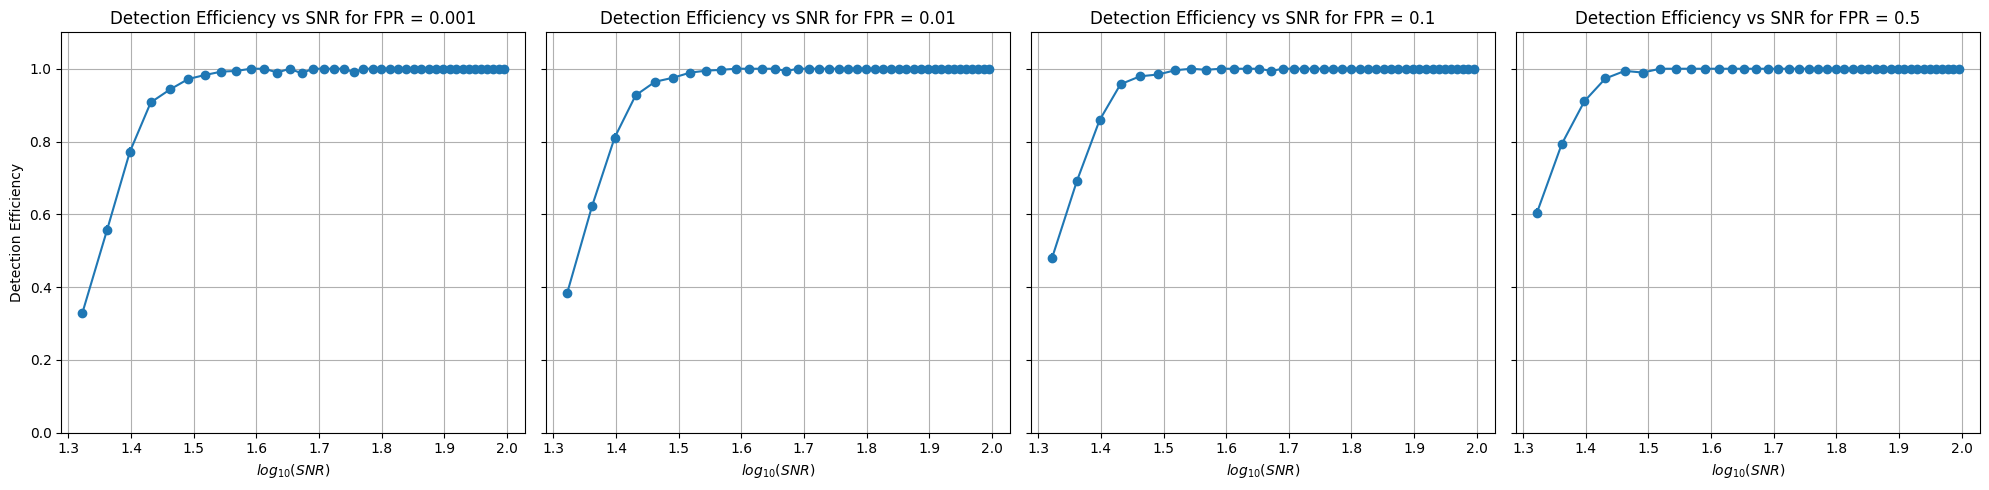

In [171]:
fprs = [0.001, 0.01, 0.1, 0.5]

fig, axes = plt.subplots(ncols=len(fprs), figsize=(5*len(fprs), 5), sharey=True)

for i, (fpr, ax) in enumerate(zip(fprs, axes)):
    bin_centers, efficiency, errors = analysis.compute_efficiency(fpr)
    ax.errorbar(np.log10(bin_centers), efficiency, yerr=errors, fmt='-o', label='Efficiency')
    ax.set_xlabel(r'$log_{10}(SNR)$')
    ax.grid()
    ax.set_title(f'Detection Efficiency vs SNR for FPR = {fpr}')

# shared y-axis
axes[0].set_ylim(0, 1.1)
axes[0].set_ylabel('Detection Efficiency')

plt.tight_layout()
plt.show()
